<a href="https://colab.research.google.com/github/CienciaDatosUdea/002_EstudiantesAprendizajeEstadistico/blob/main/semestre2025-2/Laboratorios/Laboratorio_03_reg_lin_grad_descV1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


##Estructura de un problema general de machine learning:


Los modelos de aprendizaje estadístico que pueden ser industriazados,   puede ser [esquematizado](https://proceedings.neurips.cc/paper/2015/file/86df7dcfd896fcaf2674f757a2463eba-Paper.pdf) según se muestra en la siguiente imagen:

![MLOPs](https://github.com/hernansalinas/Curso_aprendizaje_estadistico/blob/main/Sesiones/imagenes/Sesion_04_MLOP_General.png?raw=true)


![MLOPs](https://github.com/hernansalinas/Curso_aprendizaje_estadistico/blob/main/Sesiones/imagenes/Sesion_04_MLOPS.png?raw=true)



A partir de ahora, nos concentraremos en entender los modelos de que ocurren dentro de la caja negra, y como encajan dentro de una estructura general de los modelos de machine learning ML.

De forma general un modelo de [ML](https://www.coursera.org/learn/machine-learning)   puede ser visualizado de la siguiente manera :

![SupervisedModel](https://github.com/hernansalinas/Curso_aprendizaje_estadistico/blob/main/Sesiones/imagenes/Sesion_04_GeneralTraining.png?raw=true)



## ¿Cual es el mejor enfoque para optimizar un problema?

[Non-Free-Lunch-Theorem](https://ieeexplore.ieee.org/document/585893):
Por cada par de algoritmos hay tantos problemas en el que el primer algoritmo es mejor que el segundo como problemas en el que el segundo es mejor que el primero, como consecuencia no existe un unico algoritmo inteligente para optimizar un problema, siempre es recomendable emplear un cierto conocimiento especifico de un problema.



##  Estructura general de los problemas ML:
1. Construir hipotesis.
2. Elegir parametros
3. Elegir la funcion de coste.
4. Minimizar los datos
5. Validar y entrenar.



## Aprendizaje Supervisado :

- Datos etiquetados
- Retroalimentación directa
- Predicción de resultados.










## Regresión lineal:



Supongamos que tenemos un sistema en el que existe un predicor con  **m** valores de entrenamiento,  asi:   $ (x^{(1)}, y^{(1)} ) , (x^{(2)}, y^{(2)}) ... (x^{(m)}, y^{(m)})$


|Training|Y  | X_1  |
|--------|---|----------|
|$1$     |$Y^{1}$ | $X_1^{1}$|
|$2$     |$Y^{2}$ | $X_1^{2}$|
|$.$     |$.$     | $.$      |
|$.$     |$.$     | $.$      |
|$.$     |$.$     | $.$      |
|$m$     |$Y^{m}$ | $X_1^{m}$  |



Podemos definir un modelo lineal  como : $h(X) = \theta_0 + \theta_1 X$ con $(\theta_0 , \theta_1)$ parámetros. Nuestro objetivo es encontrar el conjunto de puntos  $(\theta_0 , \theta_1)$ que se encuentan más "cercano" a $Y$ para cada $X$.

Para la optimización, vamos a definir la función de coste **$J(\theta_1,\theta_2 )$** para las muestras de entrenamiento como aquella que garantiza la distancia euclidiana respecto a la hipotesis planteada, así:

\begin{equation}
J(\theta_1, \theta_2)=\frac{1}{2m} \sum_{i=0}^m ( h_{\theta} (x^{(i)})-y^{(i)})^2
\end{equation}

Para encontrar los valores  $(\theta_0 , \theta_1)$ se necesita  minimizar la función de coste, que permite obtener los valores más cercanos,  esta minimización podrá ser realizada a través de diferentes métodos el más conocido es el gradiente descendente.

![](https://github.com/hernansalinas/Curso_aprendizaje_estadistico/blob/main/Sesiones/imagenes/fig00.png?raw=true=50x)




Supongamos un modelo lineal para realizar la predicción, así nuestro modelo estará basado en la siguiente hipotesis de trabajo:

$h(X) =\theta_0 + \theta_1 X$


Reemplando el modelo anterior en la función de coste, tenemos que:



\begin{equation}
J(\theta_1, \theta_2)=\frac{1}{2m} \sum_{i=0}^m ( (\theta_0 + \theta_1 X)- y^{(i)})^2
\end{equation}



# Laboratorio 03


1. Supongamos que un conjunto de características y datos etiquetados estan dados de la siguiente manera:

Crear un data frame de pandas con los siguientes datos:

|Entrenamiento|Y| X_1 |
|-|-|-|
|0|0|0|
|1|1|1|
|2|2|2|
|3|3|3|
|4|4|4|
|m|5|5|





In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

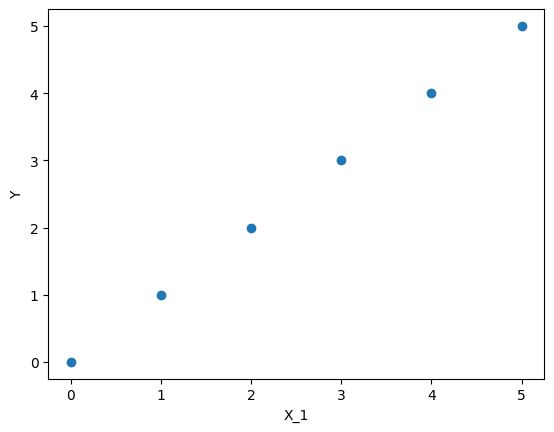

In [48]:
data = {
    'Entrenamiento': [0, 1, 2, 3, 4, 5],
    'Y': [0, 1, 2, 3, 4, 5],
    'X_1': [0, 1, 2, 3, 4, 5]
}

data = pd.DataFrame(data)

plt.plot(data['X_1'], data['Y'], 'o')
plt.xlabel('X_1')
plt.ylabel('Y')
plt.show()




2. Crear una función para calcular la función de coste.




In [49]:
def linear_model(theta_0, theta_1, x):
    return theta_0 + theta_1 * x

def MSE(y_true, y_predict):
    """
    Returns the Mean Squared Error (MSE) from arrays
    """
    mse = 1 / (len(y_true)) * np.sum((y_true - y_predict) ** 2)

    return mse



3. Asumiendo que $\theta_0=0$, represente gráficamente la función de costo para diferentes valores de $\theta_1$. Determine el valor mínimo de la función de costo y, con este valor, grafique la ecuación de regresión obtenida sobre los datos del dataframe que ha construido.



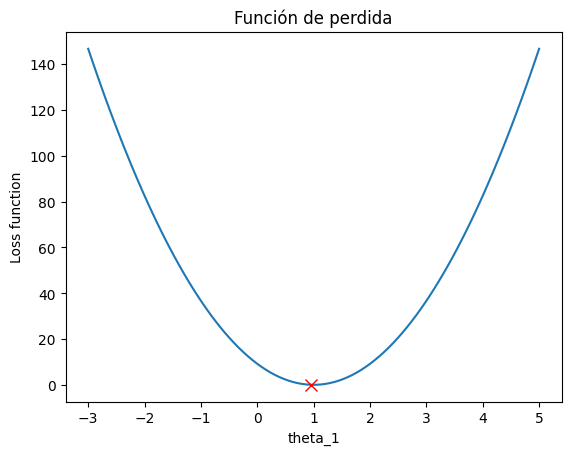

Mínimo en 0.960, Loss=0.014964


In [55]:
x_train = data['X_1']
y_train = data['Y']

# Rango para theta 1 con theta_0 fijo en 0
theta_1_test = np.linspace(-3, 5, 100)
loss_function = []

# Iterar sobre distintos valores de theta_1
for theta_1 in theta_1_test:
    y_predict = linear_model(0, theta_1, x_train)
    loss_function.append(MSE(y_train, y_predict))

# Encontrar y marcar el mínimo
min_idx = np.argmin(loss_function)
min_theta_1 = theta_1_test[min_idx]
min_loss = loss_function[min_idx]

plt.plot(theta_1_test, loss_function)
plt.plot(min_theta_1, min_loss, 'rx', markersize=8)
plt.xlabel('theta_1')
plt.ylabel('Loss function')
plt.title('Función de perdida')
plt.show()

print(f"Mínimo en {min_theta_1:.3f}, Loss={min_loss:.6f}")


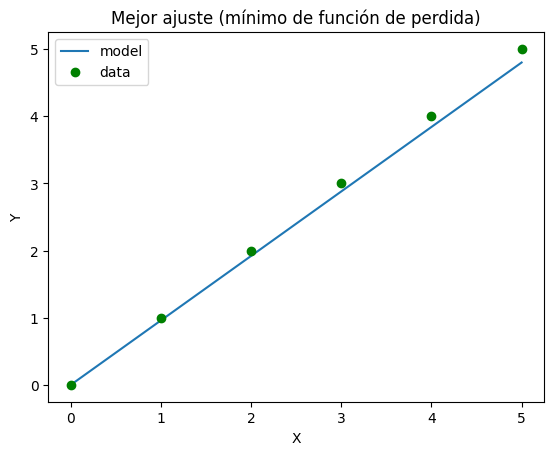

In [67]:
X = np.linspace(data['X_1'].min(), data['X_1'].max(), 10)

model = min_theta_1 * X
plt.plot(X, model, label='model')
plt.plot(data['X_1'], data['Y'], 'go', label='data')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.title('Mejor ajuste (mínimo de función de perdida)')
plt.show()



4. Suponiendo ahora que los datos de entrenamiento viene dados de la siguiente manera:

|Entrenamiento|Y| X_1 |
|-|-|-|
|0|0|0|
|1|1|1|
|2|2|2|
|3|3|3|
|4|4|4|
|m|5|5|

Encontrar la función de coste para diferentes valores de $\theta_0$, $\theta_1$.
Para ello puede emplear los metodos `surface` y `contour` dentro de la libreria de `matplotlib`.  Construya primero, con los valores de $\theta_0$, $\theta_1 $ definidos un `np.meshgrid` y evalue  para cada punto $\theta_0$, $\theta_1$ la función de coste.

Para el gráfico 3D puede emplear algo similar a las siguientes lineas de código

```
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot_surface(t0, t1, J )
ax.contour(t0, t1, J, 200,   linestyles="solid")
ax.set_xlabel("$\\theta_0$")
ax.set_ylabel("$\\theta_1$")
plt.show()
```


En los casos anteriores la solución solo involucra 1 y 2 parámetros para la representación de la función de coste en  2D y 3D respectivamente. Cuando se tienen más parametros a optmizar, no podemos tener una representacion gráfica, análoga a los casos anteriores. Notese además que los datos anteriores no tiene ningún ruido y solo se esta realizados  de esta manera, por motivos didácticos.



In [ ]:
# Superficie 3D 
rango = np.arange(-3, 5, 0.1)
theta0_mesh, theta1_mesh = np.meshgrid(rango, rango)

# Calcular la función de pérdida para cada par (theta_0, theta_1)
loss_surface = np.zeros_like(theta0_mesh)

for i in range(theta0_mesh.shape[0]):
    for j in range(theta0_mesh.shape[1]):
        theta_0 = theta0_mesh[i, j]
        theta_1 = theta1_mesh[i, j]
        
        # Calcular predicciones
        y_predict = linear_model(theta_0, theta_1, x_train)
        
        # Calcular MSE
        loss_surface[i, j] = MSE(y_train, y_predict)


In [78]:
# Visualización 3D con plotly  (graficas asistidas por IA :p)
import plotly.graph_objects as go

# Encontrar el mínimo global
min_idx = np.unravel_index(np.argmin(loss_surface), loss_surface.shape)
min_theta0 = theta0_mesh[min_idx]
min_theta1 = theta1_mesh[min_idx]
min_loss = loss_surface[min_idx]

# Crear la superficie 3D
fig = go.Figure(data=[
    go.Surface(
        x=theta0_mesh,
        y=theta1_mesh, 
        z=loss_surface,
        colorscale='Blues',
        opacity=0.6,
        name='Función de pérdida'
    ),

    go.Scatter3d(
        x=[min_theta0],
        y=[min_theta1],
        z=[min_loss],
        mode='markers',
        marker=dict(size=3, color='red'),
        name='Mínimo global'
    )
])

# Configurar el layout
fig.update_layout(
    title=f'Superficie de la Función de Pérdida',
    scene=dict(
        xaxis_title='θ0',
        yaxis_title='θ1', 
        zaxis_title='Loss',
        camera=dict(eye=dict(x=1.5, y=1.5, z=1.5))
    ),
    width=800,
    height=600
)

# Mostrar la gráfica
fig.show()



5. Encontrar la expresión teórica para la función de coste en el caso 1D y 2D.

asq2we

# Gradiente Descendente


Para determinar el mínimo,  a través del gradiente descendente puede ser aplicada el siguiente algoritmo:

- Proponer un número aleatorios inicial $\omega_i$
- Para descender al mínimo de la función, encontremos un  valor para el cual
el deriva de la función descenciende, asi:
\begin{equation}
\omega_{i+1} = \omega_{i} - \alpha \frac{\mathrm{d}f(\omega_i)}{\mathrm{d}\omega}
\end{equation}

donde, $\alpha$ es conocido como la tasa de aprendizaje del algoritmo.

- Evaluar $f(\omega_{i+1})$

- Iterar hasta encontrar el mínimo de la función


6. Construya un algoritmo en el que emplee el gradiente descente para determinar el minimo de una función, determine el mínimo con una error epsilon de  1E-4, pruebe su algoritmo para $f(x)= (x-4)^2$ y al menos 3 valores de $\alpha$





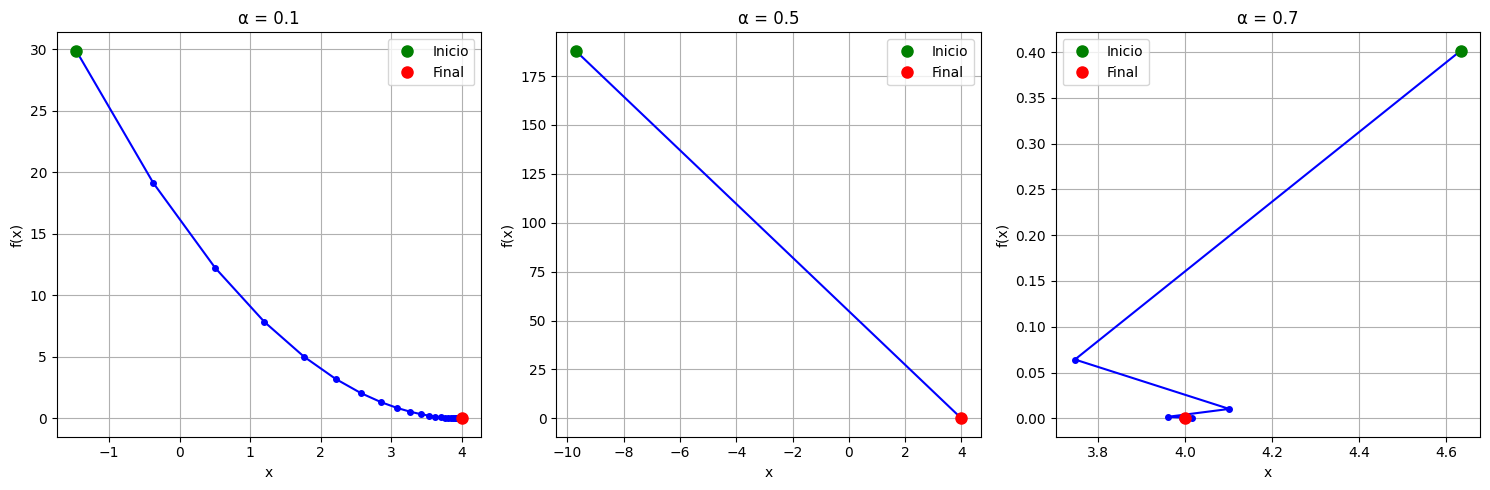

In [95]:

import numpy as np
import matplotlib.pyplot as plt

def f(x):
    """Función objetivo: f(x) = (x-4)**2"""
    return (x - 4)**2

def df_dx(x):
    """Derivada analítica: f'(x) = 2(x-4)"""
    return 2 * (x - 4)

def gradient_descent(alpha, epsilon=1e-4, max_iter=1000):
    """
    Algoritmo de descenso de gradiente
    """
    # Punto inicial aleatorio entre -10, 10
    x = np.random.random() * 20 - 10
    
    # Historial para visualización
    x_history = [x]
    f_history = [f(x)]
    
    for i in range(max_iter):
        # Calcular gradiente (derivada)
        gradient = df_dx(x)
        
        # Actualizar posición
        x_new = x - alpha * gradient
        
        # Verificar convergencia
        if abs(x_new - x) < epsilon:
            break
            
        x = x_new
        x_history.append(x)
        f_history.append(f(x))
    
    return x, f(x), x_history, f_history

# Probar con 3 valores de alpha
alphas = [0.1, 0.5, 0.7]
results = {}

plt.figure(figsize=(15, 5))

for i, alpha in enumerate(alphas):
    x_min, f_min, x_hist, f_hist = gradient_descent(alpha)
    results[alpha] = {'x_min': x_min, 'f_min': f_min, 'x_hist': x_hist, 'f_hist': f_hist}
    
    # Gráfica de convergencia
    plt.subplot(1, 3, i+1)
    plt.plot(x_hist, f_hist, 'bo-', markersize=4)
    plt.plot(x_hist[0], f_hist[0], 'go', markersize=8, label='Inicio')
    plt.plot(x_hist[-1], f_hist[-1], 'ro', markersize=8, label='Final')
    plt.xlabel('x')
    plt.ylabel('f(x)')
    plt.title(f'α = {alpha}')
    plt.legend()
    plt.grid(True)

plt.tight_layout()
plt.show()


7. Para responder este punto puede consultar la siguiente  página y seguir el video[Ejemplo guia: dotcsv](https://www.youtube.com/watch?v=-_A_AAxqzCg):

Encontrar el mínimo de la siguiente función a través del metodo del gradiente descendente https://en.wikipedia.org/wiki/Gradient_descent:


\begin{equation}
F(x,y) = \sin \left( \frac{1}{2}x^2-\frac{1}{4}y^2 +3\right) \cos (2x+1-e^y)
\end{equation}

  -  Para ello realice una gráfica de la función en 3D, y un mapa de contorno de la función.
  - Determine el valor mínimo de la función con el metodo del gradiente descendente.


In [117]:
# Graficas 3d asisticas por IA
import numpy as np
import plotly.graph_objects as go

def F(x, y):
    return np.sin(0.5*x**2 - 0.25*y**2 + 3) * np.cos(2*x + 1 - np.exp(y))

def dF_dx(x, y):
    term1 = np.sin(0.5*x**2 - 0.25*y**2 + 3)
    term2 = np.cos(2*x + 1 - np.exp(y))
    dterm1_dx = np.cos(0.5*x**2 - 0.25*y**2 + 3) * x
    dterm2_dx = -np.sin(2*x + 1 - np.exp(y)) * 2
    return dterm1_dx * term2 + term1 * dterm2_dx

def dF_dy(x, y):
    term1 = np.sin(0.5*x**2 - 0.25*y**2 + 3)
    term2 = np.cos(2*x + 1 - np.exp(y))
    dterm1_dy = np.cos(0.5*x**2 - 0.25*y**2 + 3) * (-0.5*y)
    dterm2_dy = -np.sin(2*x + 1 - np.exp(y)) * (-np.exp(y))
    return dterm1_dy * term2 + term1 * dterm2_dy

# Crear malla para visualización
x_range = np.linspace(-3, 3, 50)
y_range = np.linspace(-3, 3, 50)
X, Y = np.meshgrid(x_range, y_range)
Z = F(X, Y)

# Gráfica 3D con mapa de contorno en el piso
fig = go.Figure()

# Superficie 3D
fig.add_trace(go.Surface(x=X, y=Y, z=Z, colorscale='Blues', opacity=0.8, name='F(x,y)'))
fig.update_layout(
    title='Superficie 3D de F(x, y)',
    scene = dict(
        xaxis_title='x',
        yaxis_title='y',
        zaxis_title='F(x,y)'
    )
)


fig.show()

# Mapa de contorno separado
fig_contour = go.Figure(data=[
    go.Contour(x=x_range, y=y_range, z=Z, colorscale='Viridis', contours=dict(showlabels=True))
])

fig_contour.update_layout(
    title='Mapa de contorno de F(x,y)',
    xaxis_title='x', yaxis_title='y',
    width=600, height=500
)

fig_contour.show()


In [122]:
def gradient_descent_3d(alpha=0.01, epsilon=1e-4, max_iter=1000):
    # Punto inicial aleatorio
    x = np.random.uniform(-2, 2)
    y = np.random.uniform(-2, 2)
    
    # Historial para visualización
    x_hist = [x]
    y_hist = [y]
    f_hist = [F(x, y)]
    
    for i in range(max_iter):
        # Calcular gradientes
        grad_x = dF_dx(x, y)
        grad_y = dF_dy(x, y)
        
        # Actualizar posición
        x_new = x - alpha * grad_x
        y_new = y - alpha * grad_y
        
        # Verificar convergencia
        if abs(x_new - x) < epsilon and abs(y_new - y) < epsilon:
            print(f"Convergencia alcanzada en {i+1} iteraciones")
            break
            
        x, y = x_new, y_new
        x_hist.append(x)
        y_hist.append(y)
        f_hist.append(F(x, y))
    
    return x, y, F(x, y), x_hist, y_hist, f_hist

# Ejecutar descenso de gradiente
x_min, y_min, f_min, x_hist, y_hist, f_hist = gradient_descent_3d(alpha=0.01)


# Visualización 3D con trayectoria y mapa de contorno en el piso
fig = go.Figure()

# Superficie principal
fig.add_trace(go.Surface(x=X, y=Y, z=Z, colorscale='Blues', opacity=0.6, name='F(x,y)'))


# Punto inicial
fig.add_trace(go.Scatter3d(
    x=[x_hist[0]], y=[y_hist[0]], z=[f_hist[0]],
    mode='markers', marker=dict(size=8, color='green'),
    name='Inicio'
))

# Punto final
fig.add_trace(go.Scatter3d(
    x=[x_hist[-1]], y=[y_hist[-1]], z=[f_hist[-1]],
    mode='markers', marker=dict(size=8, color='red'),
    name='Final'
))

# Trayectoria
fig.add_trace(go.Scatter3d(
    x=x_hist, y=y_hist, z=f_hist,
    mode='lines+markers', line=dict(color='orange', width=4),
    marker=dict(size=3, color='orange'),
    name='Trayectoria'
))



fig.update_layout(
    title=f'Descenso de Gradiente',
    scene=dict(
        xaxis_title='x', 
        yaxis_title='y', 
        zaxis_title='F(x,y)',
        camera=dict(eye=dict(x=1.5, y=1.5, z=1.2))
    ),
    width=1000, height=800
)

fig.show()


Convergencia alcanzada en 865 iteraciones


# Modelo de *machine learning*: Solución general

Un modelo general para solucionar un problema de machinine learning puede ser estructurado como sigue:


a. Eliger el modelo a emplear:
\begin{equation}
h(X,\Theta)
\end{equation}

- En el caso de una regresion lineal tenemos que $h(X,\Theta=(\theta_0, \theta_1))$:

    \begin{equation}
    h(X) = (\theta_0 + \theta_1 X)
    \end{equation}


b. Eligir la funcion de coste :
-  Metrica Ecuclidiana:
\begin{equation}
J(\Theta)=\frac{1}{2m} \sum_{i=1}^m ( h_{\theta} (X^{(i)})-y^{(i)})^2
\end{equation}
- [Lista de funciones de coste que pueden ser empleadas](https://jmlb.github.io/flashcards/2018/04/21/list_cost_functions_fo_neuralnets/)


c. Aplicar el gradiente descendente iterativamente, hasta encontrar el minimo:  

\begin{equation}
\Delta \vec{\Theta} =  - \alpha \nabla J(\Theta)
\end{equation}



- En el caso de una regresion lineal tenemos que $h(X,\Theta=(\theta_0, \theta_1))$:


\begin{equation}
\theta_0 := \theta_0 - \alpha \frac{\partial J}{\partial \theta_0}
\end{equation}

\begin{equation}
\theta_1 := \theta_1 - \alpha \frac{\partial J}{\partial \theta_1}
\end{equation}

In [ ]:
# Punto 8: Regresión lineal con gradiente descendente

# Generar datos
X = np.linspace(0, 1, 100)
y = 0.2 + 0.2*X + 0.02*np.random.random(100)

# Agregar columna de unos para theta_0
X_with_bias = np.column_stack([np.ones(len(X)), X])

def MSE_loss(y_true, y_pred):
    return np.mean((y_true - y_pred)**2)

def gradient_descent_linear(X, y, alpha=0.01, max_iter=1000, epsilon=1e-6):
    # Inicializar parámetros aleatoriamente
    theta = np.random.normal(0, 0.1, X.shape[1])
    
    for i in range(max_iter):
        # Predicciones
        y_pred = X @ theta
        
        # Calcular gradientes
        gradient = (1/len(y)) * X.T @ (y_pred - y)
        
        # Actualizar parámetros
        theta_new = theta - alpha * gradient
        
        # Verificar convergencia
        if np.linalg.norm(theta_new - theta) < epsilon:
            break
            
        theta = theta_new
    
    return theta

# Ejecutar gradiente descendente
theta_optimal = gradient_descent_linear(X_with_bias, y, alpha=0.1)

# Predicciones finales
y_pred = X_with_bias @ theta_optimal
final_loss = MSE_loss(y, y_pred)
print(f"Pérdida final (MSE): {final_loss:.6f}")

# Visualización
plt.figure(figsize=(8, 6))
plt.scatter(X, y, alpha=0.6, label='Datos')
plt.plot(X, y_pred, 'r-', linewidth=2, label='Modelo GD')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Regresión Lineal con Gradiente Descendente')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
# Punto 9: Comparación con sklearn LinearRegression

from sklearn.linear_model import LinearRegression

# Usar sklearn
sklearn_model = LinearRegression()
sklearn_model.fit(X.reshape(-1, 1), y)
y_pred_sklearn = sklearn_model.predict(X.reshape(-1, 1))

# Visualización comparativa
plt.figure(figsize=(8, 6))
plt.scatter(X, y, alpha=0.6, label='Datos', color='gray')
plt.plot(X, y_pred, 'r-', linewidth=2, label='Gradiente Descendente')
plt.plot(X, y_pred_sklearn, 'b--', linewidth=2, label='Sklearn')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Comparación: Gradiente Descendente vs Sklearn')
plt.legend()
plt.grid(True)
plt.show()


8. Empleando los siguientes datos :

```
X = np.linspace(0, 1, 100)
y = 0.2 + 0.2*X + 0.02*np.random.random(100)
```

y las herramientas desarrolladas en los apartados anteriores,
construya un algorítmo que permita determinar una regresión lineal.




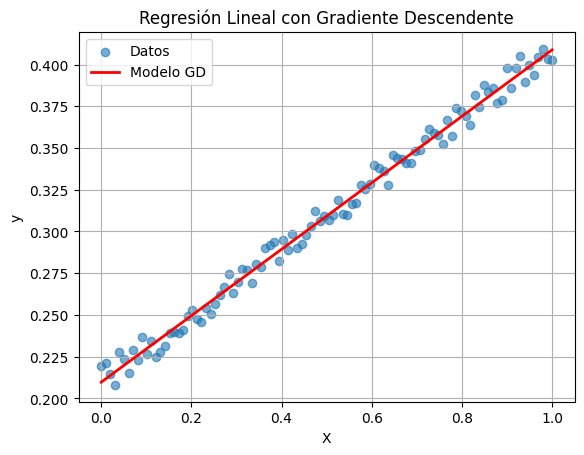

In [ ]:


# Generar datos
X = np.linspace(0, 1, 100)
y = 0.2 + 0.2*X + 0.02*np.random.random(100)

# Agregar columna de unos para theta_0
X_with_bias = np.column_stack([np.ones(len(X)), X])

def MSE_loss(y_true, y_pred):
    return np.mean((y_true - y_pred)**2)

def gradient_descent_linear(X, y, alpha=0.01, max_iter=1000, epsilon=1e-6):
    # Inicializar parámetros aleatoriamente
    theta = np.random.normal(0, 0.1, X.shape[1])
    
    
    for i in range(max_iter):
        # Predicciones
        y_pred = X @ theta
        
        # Calcular pérdida
        loss = MSE_loss(y, y_pred)

        # Calcular gradientes
        gradient = (1/len(y)) * X.T @ (y_pred - y)
        
        # Actualizar parámetros
        theta_new = theta - alpha * gradient
        
        # Verificar convergencia
        if np.linalg.norm(theta_new - theta) < epsilon:
            break
            
        theta = theta_new

    return theta

# Ejecutar gradiente descendente
theta_optimal = gradient_descent_linear(X_with_bias, y, alpha=0.1)

# Predicciones finales
y_pred = X_with_bias @ theta_optimal
final_loss = MSE_loss(y, y_pred)

# Datos y modelo
plt.scatter(X, y, alpha=0.6, label='Datos')
plt.plot(X, y_pred, 'r-', linewidth=2, label='Modelo GD')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Regresión Lineal con Gradiente Descendente')
plt.legend()
plt.grid(True)

plt.show()

9. Compare su resultado empleando la libreria linearRegresion() de sklearn.

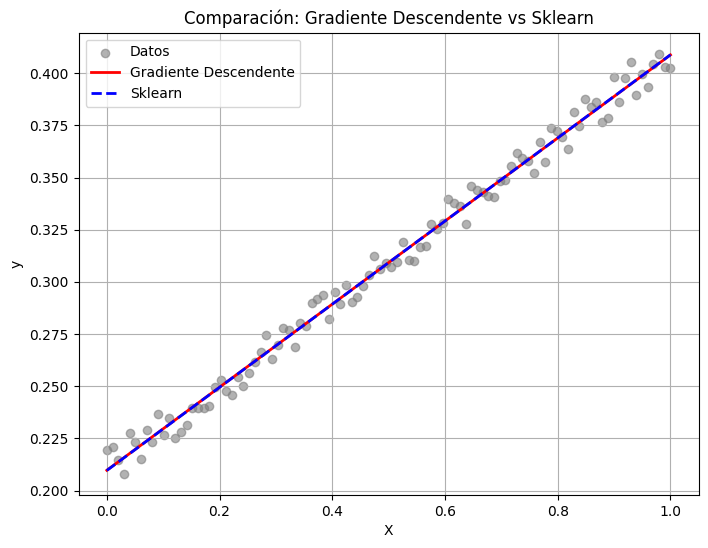

In [132]:
from sklearn.linear_model import LinearRegression

# Usar sklearn
sklearn_model = LinearRegression()
sklearn_model.fit(X.reshape(-1, 1), y)
y_pred_sklearn = sklearn_model.predict(X.reshape(-1, 1))

# Visualización comparativa
plt.figure(figsize=(8, 6))
plt.scatter(X, y, alpha=0.6, label='Datos', color='gray')
plt.plot(X, y_pred, 'r-', linewidth=2, label='Gradiente Descendente')
plt.plot(X, y_pred_sklearn, 'b--', linewidth=2, label='Sklearn')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Comparación: Gradiente Descendente vs Sklearn')
plt.legend()
plt.grid(True)
plt.show()


Hint:

Pueden comprobar la solución de la superficie con el siguiente cálculo:


\begin{equation}
J(\Theta)=\frac{1}{2m} \sum_{i=1}^m ( h_{\theta} (X^{(i)})-y^{(i)})^2
\end{equation}



Sea $\Theta^T = [\theta_0,\theta_1]$


\begin{equation}
X =
\begin{bmatrix}
1& 1 & 1 & .&.&.&1\\
x_1^{(1)}&x_1^{(2)} & x_1^{(3)} & .&.&.&x_1^{(m)}\\
\end{bmatrix}_{(n+1) \times m}
\end{equation}

Luego:

\begin{equation}
\Lambda = \Theta^T X=
\begin{bmatrix}
(\theta_0 1 + \theta_1 x_1^1)\\
(\theta_0 1 + \theta_1 x_1^2)\\
.\\
.\\
.\\
(\theta_0 1 + \theta_1 x_1^m)\\
\end{bmatrix}
\end{equation}


Sumando sobre todos los elementos de matriz se puede encontrar la función de coste $J = \mathrm{\Lambda.mean()^2}$.